Import all the required Frameworks


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Create a data with random Numbers

In [35]:
np.random.seed(42)
X=np.random.rand(100,1) - 0.5
y=3*X[:,0]**2 + 0.05*np.random.rand(100)

In [36]:
df=pd.DataFrame()
df['X'] =X.reshape(100)
df['y']=y
df.head()

,X,y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348


Text(0.5, 1.0, 'X vs y')

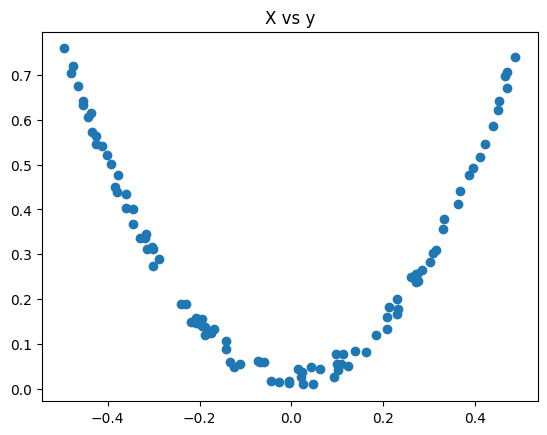

In [37]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

Step1: Model m1 gives predictions as the mean value as the target value

In [38]:
df['pred1'] =df['y'].mean()

In [39]:
df

,X,y,pred1
0,-0.125460,0.048792,0.290404
1,0.450714,0.641251,0.290404
2,0.231994,0.177181,0.290404
3,0.098658,0.054629,0.290404
4,-0.343981,0.400348,0.290404
...,...,...,...
95,-0.006204,0.017576,0.290404
96,0.022733,0.037848,0.290404
97,-0.072459,0.060606,0.290404
98,-0.474581,0.720035,0.290404


Pseudo residuals -difference between the target and the actual value

In [40]:
df['res1'] =df['y'] - df['pred1']

In [41]:
df

,X,y,pred1,res1
0,-0.125460,0.048792,0.290404,-0.241612
1,0.450714,0.641251,0.290404,0.350847
2,0.231994,0.177181,0.290404,-0.113223
3,0.098658,0.054629,0.290404,-0.235775
4,-0.343981,0.400348,0.290404,0.109944
...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828
96,0.022733,0.037848,0.290404,-0.252556
97,-0.072459,0.060606,0.290404,-0.229798
98,-0.474581,0.720035,0.290404,0.429631


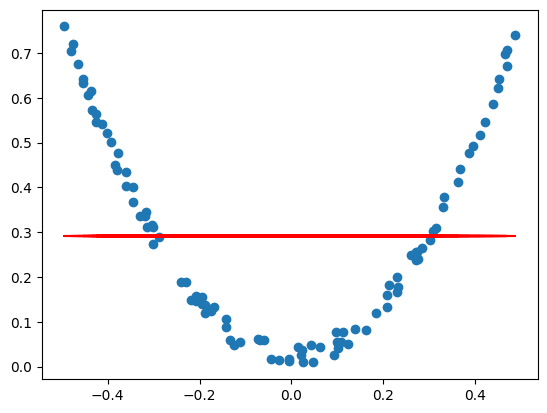

In [42]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

The target of the Decision Tree m2 is res1(residuals of the previous Predictor)

In [45]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [46]:
from sklearn.tree import plot_tree

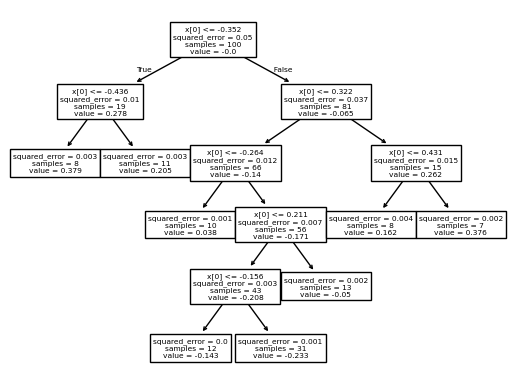

In [47]:
plot_tree(tree1)
plt.show()

In [48]:
#generating the X_test
X_test=np.linspace(-0.5,0.5,500)

In [49]:
y_pred=0.290404+tree1.predict(X_test.reshape(500,1))

In [50]:
y_pred

array([0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.66938886, 0.66938886,
       0.66938886, 0.66938886, 0.66938886, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521999,
       0.49521999, 0.49521999, 0.49521999, 0.49521999, 0.49521

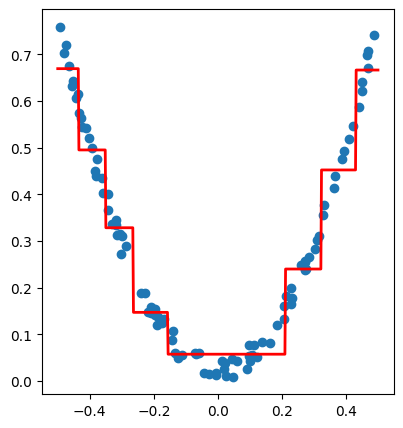

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [52]:
df['pred2']=0.290404+tree1.predict(df['X'].values.reshape(100,1))

In [53]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509
1,0.450714,0.641251,0.290404,0.350847,0.666444
2,0.231994,0.177181,0.290404,-0.113223,0.240031
3,0.098658,0.054629,0.290404,-0.235775,0.057509
4,-0.343981,0.400348,0.290404,0.109944,0.328478
...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.057509
96,0.022733,0.037848,0.290404,-0.252556,0.057509
97,-0.072459,0.060606,0.290404,-0.229798,0.057509
98,-0.474581,0.720035,0.290404,0.429631,0.669389


In [54]:
df['res2'] =df['y'] - df['pred2']

In [55]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.048792,0.290404,-0.241612,0.057509,-0.008717
1,0.450714,0.641251,0.290404,0.350847,0.666444,-0.025193
2,0.231994,0.177181,0.290404,-0.113223,0.240031,-0.062849
3,0.098658,0.054629,0.290404,-0.235775,0.057509,-0.002880
4,-0.343981,0.400348,0.290404,0.109944,0.328478,0.071870
...,...,...,...,...,...,...
95,-0.006204,0.017576,0.290404,-0.272828,0.057509,-0.039933
96,0.022733,0.037848,0.290404,-0.252556,0.057509,-0.019660
97,-0.072459,0.060606,0.290404,-0.229798,0.057509,0.003098
98,-0.474581,0.720035,0.290404,0.429631,0.669389,0.050646


In [56]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In model(m3) res2 is the target value of a given Decision Tree

In [57]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [58]:
y_pred=0.290404+sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

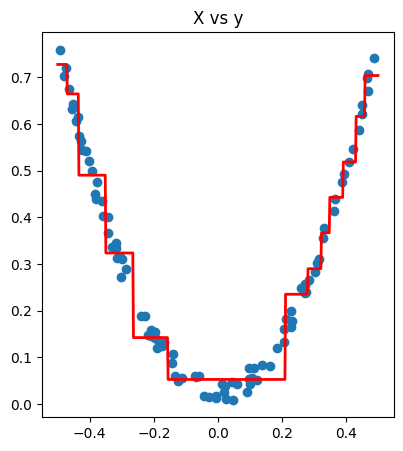

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

Conclusion :here we have intenionally used 3 models(m1-> mean of target, m2-> target is res1 and m3-> target is the res2